<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/ML_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
x,y = load_iris(return_X_y= True)

In [87]:
df_x = pd.DataFrame(x)

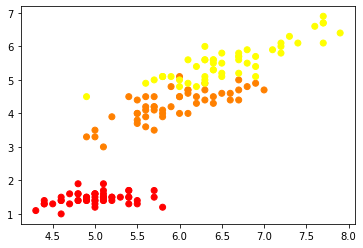

In [88]:
plt.scatter(df_x[0],df_x[2],cmap="autumn",c=y)

In [89]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
'''
x_1=x[:40]
x_2=x[50:90]
x_3=x[100:140]
y_1=y[:40]
y_2=y[50:90]
y_3=y[np.where(y==2)[0][0]:140]
'''
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

y_train = y_train.reshape(-1)

In [132]:
class SLP():

    def __init__(self):
        self.weights = None
        self.bias = None
        self.optimal_w = 0
        self.optimal_b = 0 

    def activation(self,x):
        return 1 if (np.dot(self.weights,x) > self.bias) else 0

    def optimal_act(self,x):
        return 1 if (np.dot(self.optimal_w,x) > self.optimal_b) else 0

    def predict(self,X):
        y = []
        for x in X:
            y.append(self.optimal_act(x))
        return np.array(y)
        
    def predictions(self,X):
        y = []
        for x in X:
            y.append(self.activation(x))
        return np.array(y)
        
    def fit(self,X,Y,learning_rate,iterations):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        accuracy = {}
        self.optimal_w = np.zeros(X.shape[1])
        best_w = np.zeros(X.shape[1])
        best_b = 0
        best_acc = 0

        # for all the iterations
        for epoch in range(iterations):
            for x,y in zip(X,Y):
                y_predicted = self.activation(x)

                if y_predicted == 0 and y == 1:
                    self.weights = self.weights + learning_rate*x
                    self.bias = self.bias - learning_rate
                if y_predicted == 1 and y == 0:
                    self.weights = self.weights - learning_rate*x
                    self.bias = self.bias + learning_rate

            accuracy[epoch] = accuracy_score(self.predictions(X), Y)
            if accuracy[epoch] > best_acc:
                best_acc = accuracy[epoch]
                best_w = self.weights
                best_b = self.bias
        self.optimal_w = best_w
        self.optimal_b = best_b
        return accuracy


In [93]:
#making the training sets for all the three SLPs
y_0 = []
y_1 = []
y_2 = []

for each in y_train:
    if each == 0:
        y_0.extend([1])
    else: 
        y_0.extend([0])
    if each == 1:
        y_1.extend([1])
    else: 
        y_1.extend([0])
    if each == 2:
        y_2.extend([1])
    else: 
        y_2.extend([0])


##Testing our SLP

In [94]:
slp_test = SLP()
acc = slp_test.fit(x_train,y_0, 0.01, 5)

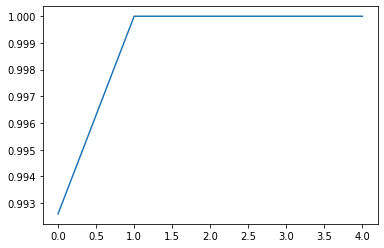

In [95]:
plt.plot(list(acc.keys()),list(acc.values()))

In [96]:
y_0_test = []
for each in y_test:
    if each == 0:
        y_0_test.extend([1])
    else: 
        y_0_test.extend([0])

In [97]:
slp_test.predict(x_test)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [98]:
y_0_test

[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

In [99]:
print("Test Accuracy : %0.2f"%(accuracy_score(y_0_test,slp_test.predict(x_test))*100),"%")

Test Accuracy : 100.00 %


----

##Testing the SLP on linearly separable datasets 

In [133]:
slp_test2 = SLP()
acc = slp_test2.fit(x_train, y_1, 0.01, 100)

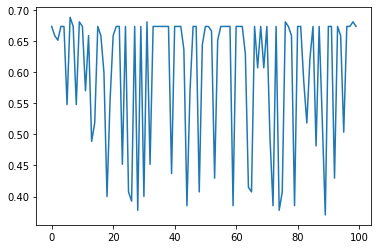

In [134]:
plt.plot(list(acc.keys()), list(acc.values()))      #Graph is noisy probably because of non-lineary separable data

In [103]:
y_1_test = []
for each in y_test:
    if each == 1:
        y_1_test.extend([1])
    else: 
        y_1_test.extend([0])

In [104]:
y_test

array([0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1])

In [105]:
y_1_test

[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]

In [106]:
slp_test2.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [138]:
print("Train Accuracy (Maximum) :  ",100*max(acc.values()),"%")
print("Test Accuracy : %0.2f"%(accuracy_score(y_1_test,slp_test2.predict(x_test))*100),"%")

Train Accuracy (Maximum) :   68.88888888888889 %
Test Accuracy : 60.00 %


-----

##Testing SLP on third class

In [151]:
slp_test3 = SLP()
acc = slp_test3.fit(x_train, y_2, 0.01, 40)

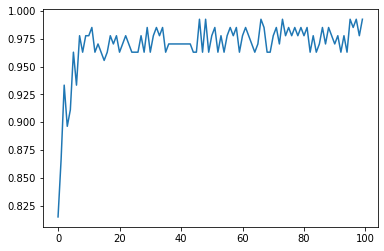

In [140]:
plt.plot(list(acc.keys()),list(acc.values()))

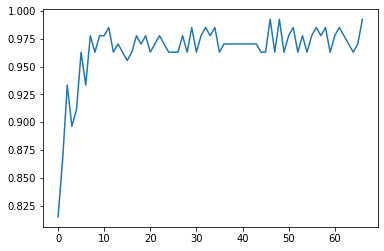

In [145]:
plt.plot(list(acc.keys()),list(acc.values()))       #Highest train accuracy after 58 iterations

In [146]:
y_2_test = []
for each in y_test:
    if each == 2:
        y_2_test.extend([1])
    else: 
        y_2_test.extend([0])

In [181]:
y_2_test

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [152]:
print("Train Accuracy (Maximum) :  ",100*max(acc.values()),"%")
print("Test Accuracy : %0.2f"%(accuracy_score(y_2_test,slp_test3.predict(x_test))*100),"%")

Train Accuracy (Maximum) :   98.51851851851852 %
Test Accuracy : 93.33 %


-----

##Building the final Multi-Class Classification Model

In [177]:
# we have a SLP and we will train three different SLP for each class of IRIS dataset.
# 0 = Setosa , 1 = Versicolor , 2 = Virginica
# While training SLP for class 0,1,2 we will make the class label 1 and rest all as 0. ONEvsALL classification
# y_0 = Setosa vs All , y_1 = Versicolor vs All, y_2 = Virignica vs All

class SLP_Classifier():
    def __init__(self,learning_rate, iterations):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.slp_0 = SLP()
        self.slp_1 = SLP()
        self.slp_2 = SLP()

    def fit(self,x_train,y_0,y_1,y_2):
        self.slp_0.fit(x_train,y_0,self.learning_rate,self.iterations)
        self.slp_1.fit(x_train,y_1,self.learning_rate,self.iterations)
        self.slp_2.fit(x_train,y_2,self.learning_rate,self.iterations)
    
    def predict(self,x):
        y_predictions = []
        yp_0 = self.slp_0.predict(x)
        yp_1 = self.slp_1.predict(x)
        yp_2 = self.slp_2.predict(x)

        #since SLP 0>3>2 we will use their classification for final labeling

        for y0,y1,y2 in zip(yp_0,yp_1,yp_2):
            if y0 == 1:
                y_predictions.extend([0])
            elif y2 == 1:
                y_predictions.extend([2])
            elif y1 == 1:
                y_predictions.extend([1])
            else: y_predictions.extend([1])
        return np.array(y_predictions)

In [180]:
slp_clf = SLP_Classifier(0.1,100)
slp_clf.fit(x_train,y_0,y_1,y_2)
y_pred = slp_clf.predict(x_test)
print("Test accuracy (3 classes together): %0.2f"%(accuracy_score(y_test,y_pred)*100),"%")

Test accuracy (3 classes together): 93.33 %


###10 different simulations 

In [182]:
 def split_testset(y_train):
    y_0 = []
    y_1 = []
    y_2 = []

    for each in y_train:
        if each == 0:
            y_0.extend([1])
        else: 
            y_0.extend([0])
        if each == 1:
            y_1.extend([1])
        else: 
            y_1.extend([0])
        if each == 2:
            y_2.extend([1])
        else: 
            y_2.extend([0])
    return y_0,y_1,y_2

In [183]:
train_accuracy = {}
test_accuracy = {}

for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)   #test size if 10% of total dataset
    scaler = preprocessing.StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = y_train.reshape(-1)

    y_0, y_1, y_2 = split_testset(y_train)

    slp_clf = SLP_Classifier(0.1,100)
    slp_clf.fit(x_train,y_0,y_1,y_2)

    test_accuracy[i] = accuracy_score(y_test, slp_clf.predict(x_test))
    train_accuracy[i] = accuracy_score(y_train,slp_clf.predict(x_train))


In [190]:
df = pd.DataFrame()
temp = []
df['Test accuracy'] = list(test_accuracy.values())
df['Train_accuracy'] = list(train_accuracy.values())
df.to_excel('ML_Lab6_Q1_Part3_Output.xlsx')

In [191]:
df

,Test accuracy,Train_accuracy
0,0.800000,0.992593
1,0.933333,0.992593
2,0.933333,0.992593
3,0.933333,0.992593
4,1.000000,0.985185
5,1.000000,0.992593
6,0.933333,0.985185
7,0.933333,0.985185
8,1.000000,0.992593
9,0.933333,0.992593


###Different Training Size Simulations

In [196]:
# Function runs ten simulations and gives average of train and test accuracies
def ten_simulations(x_train,y_train,x_test,y_test,train_size):
    for i in range(10):

        y_0, y_1, y_2 = split_testset(y_train)

        slp_clf = SLP_Classifier(0.1,100)
        slp_clf.fit(x_train,y_0,y_1,y_2)

        test_accuracy[i] = accuracy_score(y_test, slp_clf.predict(x_test))
        train_accuracy[i] = accuracy_score(y_train,slp_clf.predict(x_train))

    return sum(list(test_accuracy.values()))/len(test_accuracy.values()), sum(list(train_accuracy.values()))/len(train_accuracy.values())

In [202]:
train_acc = {}
test_acc = {}
training = [0.1,0.2,0.3,0.4,0.5,0.6]

for i in training:
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = i)   #test size if 10% of total dataset
    scaler = preprocessing.StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = y_train.reshape(-1)

    test,train = ten_simulations(x_train,y_train,x_test,y_test,i)

    test_acc[i] = test
    train_acc[i] = train

In [211]:
print("\tTrain Accuracies \t Test Accuracies")
train = list(train_acc.values())
test = list(test_acc.values())
for i in training:
    print(f"{i}\t%0.2f"%(train[int(i*10-1)]*100),"\t\t\t  %0.2f"%(test[int(i*10-1)]*100))

	Train Accuracies 	 Test Accuracies
0.1	99.94 			  86.00
0.2	99.94 			  90.64
0.3	99.80 			  92.50
0.4	99.53 			  93.94
0.5	99.53 			  93.21
0.6	99.87 			  93.14


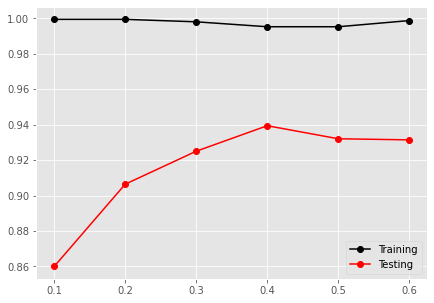

In [238]:
plt.style.use('ggplot')
plt.figure(figsize=(7,5))
line1 = plt.plot(training,train,c='black',marker="o")
line2 = plt.plot(training,test,c="red",marker='o')
plt.legend((line1[0], line2[0]),('Training','Testing'))

------

#Multi-Layer perceptron

In [270]:
x,y = load_iris(return_X_y= True)

In [271]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

y_train = y_train.reshape(-1)

X= x_train
y= y_train

In [275]:
 class MLP():

    def __init__(self,X,y,classes):
        self.num_examples = len(X) # training set size
        self.nn_input_dim = X.shape[1] # input layer dimensionality
        self.nn_output_dim = classes # output layer dimensionality
        self.X = X
        self.y = y
        # Gradient descent parameters (I picked these by hand)
        self.epsilon = 0.01 # learning rate for gradient descent
        self.reg_lambda = 0.01 # regularization strength

    def calculate_loss(self,model):
        W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
        # Forward propagation to calculate our predictions
        z1 = self.X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Calculating the loss
        corect_logprobs = -np.log(probs[range(self.num_examples), self.y])
        data_loss = np.sum(corect_logprobs)
        # Add regulatization term to loss (optional)
        data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
        return 1./num_examples * data_loss

    # Helper function to predict an output (0 or 1)
    def predict(self,model, x):
        W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
        # Forward propagation
        z1 = x.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return np.argmax(probs, axis=1)

    # - nn_hdim: Number of nodes in the hidden layer
    # - num_passes: Number of passes through the training data for gradient descent
    # - print_loss: If True, print the loss every 1000 iterations
    def build_model(self,nn_hdim, num_passes=20000, print_loss=False):
        
        # Initialize the parameters to random values. We need to learn these.
        np.random.seed(0)
        W1 = np.random.randn(self.nn_input_dim, nn_hdim) / np.sqrt(self.nn_input_dim)
        b1 = np.zeros((1, nn_hdim))
        W2 = np.random.randn(nn_hdim, self.nn_output_dim) / np.sqrt(nn_hdim)
        b2 = np.zeros((1, self.nn_output_dim))
    
        # This is what we return at the end
        model = {}
        
        # Gradient descent. For each batch...
        for i in range(0, num_passes):
    
            # Forward propagation
            z1 = self.X.dot(W1) + b1
            a1 = np.tanh(z1)
            z2 = a1.dot(W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
            # Backpropagation
            delta3 = probs
            delta3[range(self.num_examples), self.y] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(self.X.T, delta2)
            db1 = np.sum(delta2, axis=0)
    
            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += self.reg_lambda * W2
            dW1 += self.reg_lambda * W1
    
            # Gradient descent parameter update
            W1 += -self.epsilon * dW1
            b1 += -self.epsilon * db1
            W2 += -self.epsilon * dW2
            b2 += -self.epsilon * db2
            
            # Assign new parameters to the model
            model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
            
            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f"%(i, self.calculate_loss(model)))

        return model

In [272]:
# Build a model with a 3-dimensional hidden layer
mlp = MLP(X,y,3)
model = mlp.build_model(3, print_loss=True)

Loss after iteration 0: 1.105687
Loss after iteration 1000: 0.009754
Loss after iteration 2000: 0.008186
Loss after iteration 3000: 0.007843
Loss after iteration 4000: 0.007699
Loss after iteration 5000: 0.007609
Loss after iteration 6000: 0.007541
Loss after iteration 7000: 0.007484
Loss after iteration 8000: 0.007436
Loss after iteration 9000: 0.007394
Loss after iteration 10000: 0.007357
Loss after iteration 11000: 0.007324
Loss after iteration 12000: 0.007295
Loss after iteration 13000: 0.007270
Loss after iteration 14000: 0.007247
Loss after iteration 15000: 0.007228
Loss after iteration 16000: 0.007211
Loss after iteration 17000: 0.007196
Loss after iteration 18000: 0.007183
Loss after iteration 19000: 0.007172


In [273]:
print("Test Accuracy : %0.2f"%accuracy_score(y_test,predict(model,x_test)))
print("Train Accuracy : %0.2f"%accuracy_score(y_train,predict(model,x_train)))

Test Accuracy : 0.93
Train Accuracy : 1.00


In [277]:
train_accuracy = {}
test_accuracy = {}

for i in range(10):
    x,y = load_iris(return_X_y= True)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)   #test size if 10% of total dataset
    scaler = preprocessing.StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = y_train.reshape(-1)

    mlp = MLP(x_train,y_train,3)
    model = mlp.build_model(3, print_loss=False)

    test_accuracy[i] = accuracy_score(y_test, mlp.predict(model,x_test))
    train_accuracy[i] = accuracy_score(y_train,mlp.predict(model,x_train))


In [278]:
df = pd.DataFrame()
temp = []
df['Test accuracy'] = list(test_accuracy.values())
df['Train_accuracy'] = list(train_accuracy.values())
df.to_excel('ML_Lab6_Q2_Part3_Output.xlsx')

Different Train Size

In [281]:
train_acc = {}
test_acc = {}
training = [0.1,0.2,0.3,0.4,0.5,0.6]

for i in training:
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = i)   #test size if 10% of total dataset
    scaler = preprocessing.StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = y_train.reshape(-1)

    mlp = MLP(x_train,y_train,3)
    model = mlp.build_model(3, print_loss=False)

    test_acc[i] = accuracy_score(y_test, mlp.predict(model,x_test))
    train_acc[i] = accuracy_score(y_train,mlp.predict(model,x_train))

In [282]:
print("\tTrain Accuracies \t Test Accuracies")
train = list(train_acc.values())
test = list(test_acc.values())
for i in training:
    print(f"{i}\t%0.2f"%(train[int(i*10-1)]*100),"\t\t\t  %0.2f"%(test[int(i*10-1)]*100))

	Train Accuracies 	 Test Accuracies
0.1	100.00 			  74.81
0.2	100.00 			  91.67
0.3	100.00 			  96.19
0.4	100.00 			  95.56
0.5	100.00 			  93.33
0.6	100.00 			  95.00


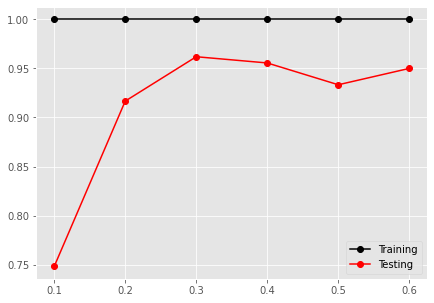

In [283]:
plt.style.use('ggplot')
plt.figure(figsize=(7,5))
line1 = plt.plot(training,train,c='black',marker="o")
line2 = plt.plot(training,test,c="red",marker='o')
plt.legend((line1[0], line2[0]),('Training','Testing'))